# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [35]:
import pandas as pd
import seaborn as sns

mydata = pd.read_csv('demo01.csv')
mydata.head(n=10)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
5,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
6,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False
7,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False
8,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,30.049315,4.438356,1,0,0,0,2.0,False
9,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,30.049315,4.438356,1,0,0,0,2.0,False


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

<AxesSubplot:xlabel='count', ylabel='mau'>

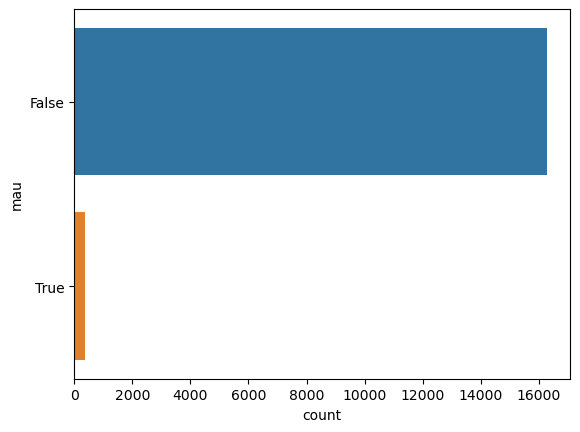

In [5]:
sns.countplot(y="mau", data=mydata)

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [29]:
#1)

#nomes=[]
#for i in mydata:
#    variaveis = mydata.readline() 
#    nomes.append(variaveis)
#    stop
#nomes 

variaveis = {'sexo': 'object', 
             'posse_de_veiculo': 'object', 
             'posse_de_imovel': 'object',
            'qtd_filhos':'int',
            'tipo_renda':'object',
            'educacao':'object',
            'estado_civil':'object',
            'tipo_residencia':'object',
            'idade':'float',
            'tempo_emprego':'float',
            'possui_celular':'int',
            'possui_fone_comercial':'int',
            'possui_fone':'int',
            'possui_email':'int',
            'qt_pessoas_residencia':'float',
            'mau':'bool'}

variaveis=pd.DataFrame.from_dict(variaveis, orient="index")
variaveis['var'] = variaveis.index


In [30]:
#2) 

categorias=[]

for column in mydata:
    numero=mydata.nunique()
    categorias.append(numero)

categorias = pd.DataFrame(categorias)
categorias=categorias.drop_duplicates()

categorias=categorias.T
categorias['var'] = categorias.index

variaveis=variaveis.merge(categorias, on='var', how='left')
variaveis

,0_x,var,0_y
0,object,sexo,2
1,object,posse_de_veiculo,2
2,object,posse_de_imovel,2
3,int,qtd_filhos,8
4,object,tipo_renda,5
5,object,educacao,5
6,object,estado_civil,5
7,object,tipo_residencia,6
8,float,idade,5298
9,float,tempo_emprego,3005


In [31]:
#3)

mydata = pd.get_dummies(mydata, prefix=["sexo", "posse_de_veiculo", "posse_de_imovel", "tipo_renda", "educacao", "estado_civil", "tipo_residencia"], 
                        columns=["sexo", "posse_de_veiculo", "posse_de_imovel", "tipo_renda", "educacao", "estado_civil", "tipo_residencia"])

mydata

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,1,...,0,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,1,...,1,0,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,0,...,1,0,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,0,...,1,0,0,0,0,1,0,0,0,0


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [32]:
mydata_dummies = mydata.drop(mydata.columns[[0, 1, 2, 7]],axis = 1)



#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [41]:
mydata2 = pd.read_csv('demo01.csv')

pd.crosstab(mydata2["possui_email"],mydata2["mau"])

mau,False,True
possui_email,,
0,14810,360
1,1450,30


In [42]:
pd.crosstab(mydata2["posse_de_veiculo"],mydata2["mau"])


mau,False,True
posse_de_veiculo,,
N,9931,247
Y,6329,143


#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [43]:
mydata_dummies.to_csv('mydata_final.csv')